## PIMA Indian Diabetes Data - UCI

!pip install graphviz

In [ ]:
# !conda install --yes python-graphviz
# !conda install --yes graphviz

In [145]:
import graphviz

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook
# import graphviz

### Problem Statement - Predict the onset of diabetes based on diagnostic measures

#### Introduction
The Pima are a group of Native Americans living in Arizona. A genetic predisposition allowed this group to survive normally to a diet poor of carbohydrates for years. In the recent years, because of a sudden shift from traditional agricultural crops to processed foods, together with a decline in physical activity, made them develop the highest prevalence of type 2 diabetes and for this reason they have been subject of many studies.

#### Dataset Description

The dataset describes the medical records for Pima Indians and whether or not each patient will have an onset of diabetes within few years.

It includes data from 768 women with 8 characteristics:

Fields description follow:

PregnantFreq = Number of times pregnant

PlasmaGlucose = Plasma glucose concentration in 2 hours in an oral glucose tolerance test

DiastolicBP = Diastolic blood pressure (mm Hg)

TricepSkinThickness = Triceps skin fold thickness (mm)

SerumInsulin = 2-Hour serum insulin (mu U/ml)

BMI = Body mass index (weight in kg/(height in m)^2)

DiabetesPedigree = Diabetes pedigree function

Age = Age (years)

Target = Class variable (1: tested positive for diabetes, 0: tested negative for diabetes)

### Reading data with predefined column names

In [82]:
data= pd.read_csv("diabetes_predictions.csv")

In [4]:
data.head(2)

,Unnamed: 0,PregnantFreq,PlasmaGlucose,DiastolicBP,TricepSkinThickness,SerumInsulin,BMI,DiabetesPedigree,Target,Age_A,Age_B,Age_C,predicted
0,0,6,148.0,72.0,35.0,155.548223,33.59375,0.626953,1,0,0,1,0.0
1,1,1,85.0,66.0,29.0,155.548223,26.59375,0.351074,0,0,1,0,1.0


In [5]:
data.dtypes

Unnamed: 0               int64
PregnantFreq             int64
PlasmaGlucose          float64
DiastolicBP            float64
TricepSkinThickness    float64
SerumInsulin           float64
BMI                    float64
DiabetesPedigree       float64
Target                   int64
Age_A                    int64
Age_B                    int64
Age_C                    int64
predicted              float64
dtype: object

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 13 columns):
Unnamed: 0             768 non-null int64
PregnantFreq           768 non-null int64
PlasmaGlucose          768 non-null float64
DiastolicBP            768 non-null float64
TricepSkinThickness    768 non-null float64
SerumInsulin           768 non-null float64
BMI                    768 non-null float64
DiabetesPedigree       768 non-null float64
Target                 768 non-null int64
Age_A                  768 non-null int64
Age_B                  768 non-null int64
Age_C                  768 non-null int64
predicted              537 non-null float64
dtypes: float64(7), int64(6)
memory usage: 78.1 KB


In [97]:
data2=pd.read_csv("processed_diabetes.csv")

In [24]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
PregnantFreq           768 non-null int64
PlasmaGlucose          768 non-null float64
DiastolicBP            768 non-null float64
TricepSkinThickness    768 non-null float64
SerumInsulin           768 non-null float64
BMI                    768 non-null float64
DiabetesPedigree       768 non-null float64
Age                    768 non-null object
Target                 768 non-null int64
dtypes: float64(6), int64(2), object(1)
memory usage: 54.1+ KB


In [26]:
data2.dtypes

PregnantFreq             int64
PlasmaGlucose          float64
DiastolicBP            float64
TricepSkinThickness    float64
SerumInsulin           float64
BMI                    float64
DiabetesPedigree       float64
Age                     object
Target                   int64
dtype: object

# Data Exploration

### Check summary statistics

In [27]:
data2.describe(include=np.number)

,PregnantFreq,PlasmaGlucose,DiastolicBP,TricepSkinThickness,SerumInsulin,BMI,DiabetesPedigree,Target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457852,0.471871,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875720,0.331308,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.203125,0.078003,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243774,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.406250,0.372559,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.593750,0.626221,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.125000,2.419922,1.000000


### Check if the data types are as expected

In [98]:
data2[["Age", "Target"]]=data2[["Age", "Target"]].astype("category")

In [29]:
data2.dtypes

PregnantFreq              int64
PlasmaGlucose           float64
DiastolicBP             float64
TricepSkinThickness     float64
SerumInsulin            float64
BMI                     float64
DiabetesPedigree        float64
Age                    category
Target                 category
dtype: object

#### Changing "Target" datatype to categorical

#### Changing "Age" datatype to categorical

### Check target distribution

In [30]:
data2.Target.value_counts()

0    500
1    268
Name: Target, dtype: int64

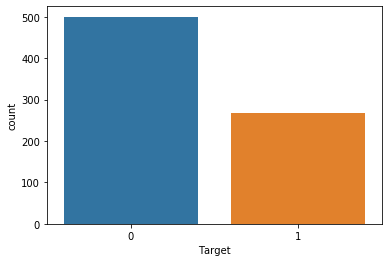

In [31]:
sns.countplot(data2.Target)

#### Correlation Matrix

In [34]:
data2.corr()

,PregnantFreq,PlasmaGlucose,DiastolicBP,TricepSkinThickness,SerumInsulin,BMI,DiabetesPedigree
PregnantFreq,1.000000,0.127911,0.208522,0.082989,0.056027,0.021524,-0.033514
PlasmaGlucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230946,0.137062
DiastolicBP,0.208522,0.218367,1.000000,0.192816,0.072517,0.281282,-0.002725
TricepSkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542338,0.100969
SerumInsulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166531,0.098614
BMI,0.021524,0.230946,0.281282,0.542338,0.166531,1.000000,0.153411
DiabetesPedigree,-0.033514,0.137062,-0.002725,0.100969,0.098614,0.153411,1.000000


#### Correlation Plot

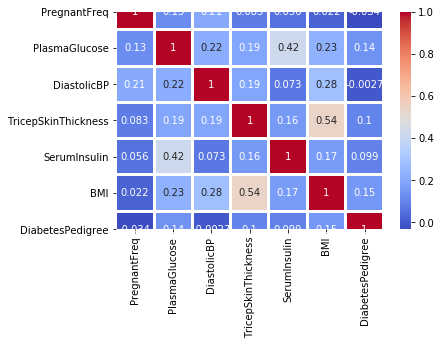

In [40]:

sns.heatmap(data2.corr(),cmap="coolwarm", annot=True, linewidths=2 )

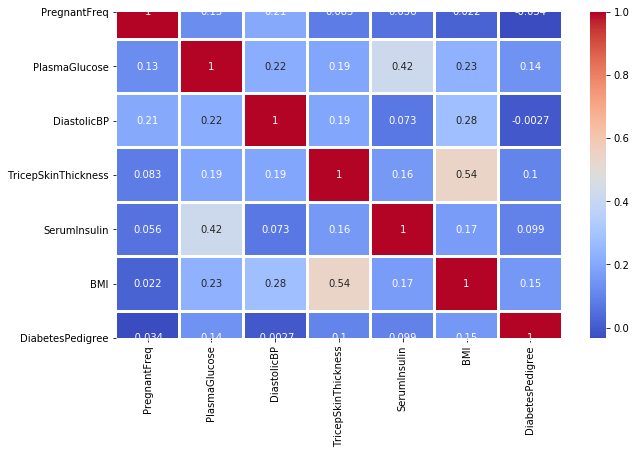

In [48]:
# fig, ax = plt.subplots()
plt.figure(figsize=(10, 6))

sns.heatmap(data2.corr(),cmap="coolwarm", annot=True, linewidths=2 )

#### Applying dummification to categorical attributes

In [77]:
data2["Age"]


0      C
1      B
2      B
3      A
4      B
5      B
6      B
7      B
8      C
9      C
10     B
11     B
12     C
13     C
14     C
15     B
16     B
17     B
18     B
19     B
20     B
21     C
22     C
23     B
24     C
25     C
26     C
27     A
28     C
29     B
      ..
738    A
739    C
740    C
741    B
742    A
743    C
744    B
745    C
746    B
747    B
748    B
749    C
750    A
751    B
752    B
753    B
754    C
755    B
756    B
757    C
758    B
759    C
760    A
761    C
762    B
763    C
764    B
765    B
766    C
767    A
Name: Age, Length: 768, dtype: category
Categories (3, object): [A, B, C]

In [99]:
cols=["Age"]
data2=pd.get_dummies(data2,columns=cols,prefix=cols, prefix_sep="_", drop_first=True ) 

In [100]:
X=data2[data2.columns.difference(["Target"])]
y=data2["Target"]

In [101]:
X.shape, y.shape, type(y)

((768, 9), (768,), pandas.core.series.Series)

### Test-Train split

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=9)

In [115]:
print('X_train',X_train.shape)
print('y_train',y_train.shape)
print('X_test',X_test.shape)
print('y_test',y_test.shape)

X_train (537, 9)
y_train (537,)
X_test (231, 9)
y_test (231,)


# Decision Trees

In [92]:
X_train.head()

,Age_A,Age_B,Age_C,BMI,DiabetesPedigree,DiastolicBP,PlasmaGlucose,PregnantFreq,SerumInsulin,TricepSkinThickness
458,0,0,1,37.593750,1.000977,84.0,148.0,10,237.000000,48.00000
343,0,1,0,34.687500,0.290039,86.0,122.0,5,155.548223,29.15342
720,0,1,0,29.296875,0.316895,86.0,83.0,4,155.548223,19.00000
420,0,1,0,45.312500,0.506836,88.0,119.0,1,170.000000,41.00000
53,0,0,1,33.687500,0.467041,90.0,176.0,8,300.000000,34.00000


In [93]:
data2.dtypes

PregnantFreq              int64
PlasmaGlucose           float64
DiastolicBP             float64
TricepSkinThickness     float64
SerumInsulin            float64
BMI                     float64
DiabetesPedigree        float64
Target                 category
Age_A                     uint8
Age_B                     uint8
Age_C                     uint8
dtype: object

### Model 1 - default parameters

In [116]:
       ## Training Model
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Checking accuracy

In [117]:
from sklearn.metrics import accuracy_score
y_pred=DT.predict(X_test)


In [120]:
DT.score( X_test, y_test)
DT.score(X_train, y_train)

1.0

In [108]:
acc=accuracy_score(y_test, y_pred)
acc

0.6796536796536796

## Confusion Matrix and Classification Report

In [126]:
from sklearn.metrics import confusion_matrix


print("Train - Confusion Matrix")
print(confusion_matrix(y_train,DT.predict(X_train)))

print("Test - Confusion Matrix")
print(confusion_matrix(y_test,DT.predict(X_test)))

Train - Confusion Matrix
[[350   0]
 [  0 187]]
Test - Confusion Matrix
[[117  33]
 [ 34  47]]


### Any observations in the previous model? 

#### Parameters
* criterion : string, optional (default=”gini”)
    The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

* min_samples_split : int, float, optional (default=2) -
    The minimum number of samples required to split an internal node.

* max_depth : int or None, optional (default=None) -
    The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

* min_samples_leaf : int, float, optional (default=1) -
    The minimum number of samples required to be at a leaf node.

* max_leaf_nodes : int or None, optional (default=None) -
    Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

## Important variables

In [131]:
features = X_train.columns
importances = DT.feature_importances_
indices = np.argsort(importances)[::-1]
pd.DataFrame([X_train.columns[indices],np.sort(importances)[::-1]])

,0,1,2,3,4,5,6,7,8
0,PlasmaGlucose,BMI,DiabetesPedigree,DiastolicBP,PregnantFreq,TricepSkinThickness,SerumInsulin,Age_B,Age_C
1,0.345753,0.169416,0.148268,0.0916545,0.0850065,0.0730959,0.0718615,0.0149443,0


In [111]:
indices

array([5, 2, 3, 4, 7, 6, 8, 1, 0], dtype=int64)

In [128]:
importances

array([0.        , 0.00618197, 0.17431545, 0.14566042, 0.08547575,
       0.375052  , 0.07709479, 0.08161275, 0.05460688])

In [130]:
np.argsort(importances)

array([0, 1, 8, 6, 7, 4, 3, 2, 5], dtype=int64)

In [129]:
features

Index(['Age_B', 'Age_C', 'BMI', 'DiabetesPedigree', 'DiastolicBP',
       'PlasmaGlucose', 'PregnantFreq', 'SerumInsulin', 'TricepSkinThickness'],
      dtype='object')

In [133]:
importances[indices]

array([0.34575262, 0.16941648, 0.14826811, 0.09165451, 0.0850065 ,
       0.07309595, 0.07186149, 0.01494434, 0.        ])

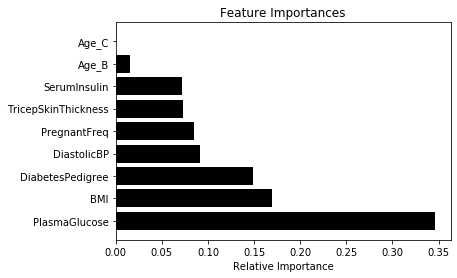

In [132]:
fig, ax = plt.subplots()
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='black')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Building Decision Tree Model using Variable Importance

In [138]:
select=indices[:5]
DT=DecisionTreeClassifier(max_depth=3)
DT.fit(X_train.iloc[:, select], y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [140]:
y_pred=DT.predict(X_test.iloc[:, select])

In [142]:
DT.score(X_test.iloc[:, select], y_test)

0.7229437229437229

### Checking accuracy

In [ ]:
print('Train Accuracy =',imp_tree.score(X_train.iloc[:,select], y_train))
print('Test Accuracy =',imp_tree.score(X_test.iloc[:,select], y_test))

## Confusion Matrix and Classification Report

In [144]:
from sklearn.metrics import confusion_matrix


print("Train - Confusion Matrix")
print(confusion_matrix(y_train,DT.predict(X_train.iloc[:,select])))

print("Test - Confusion Matrix")
print(confusion_matrix(y_test,DT.predict(X_test.iloc[:,select])))

Train - Confusion Matrix
[[335  15]
 [106  81]]
Test - Confusion Matrix
[[138  12]
 [ 52  29]]


### Model 2
1. Entropy based splits
2. Max tree depth = 5

In [148]:
select=indices[:5]
DT=DecisionTreeClassifier(max_depth=5, criterion="entropy")
DT.fit(X_train.iloc[:, select], y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [149]:
y_pred=DT.predict(X_test.iloc[:, select])

In [150]:
DT.score(X_test.iloc[:, select], y_test)

0.7142857142857143

In [ ]:

print("Train - Confusion Matrix")
print(confusion_matrix(y_train,DT.predict(X_train.iloc[:,select])))

print("Test - Confusion Matrix")
print(confusion_matrix(y_test,DT.predict(X_test.iloc[:,select])))

dot_data = tree.export_graphviz(dt2_entropy, out_file=None,feature_names=X.columns,filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render("dt2_entropy_maxdept5") 

### Model 3
1. Entropy based splits
2. max_leaf_nodes

In [151]:
select=indices[:5]
DT=DecisionTreeClassifier(max_leaf_nodes=5, criterion="entropy")
DT.fit(X_train.iloc[:, select], y_train)
y_pred=DT.predict(X_test.iloc[:, select])
DT.score(X_test.iloc[:, select], y_test)


0.7272727272727273

### Which model/parameters to choose for best accuracy?
### Will the model be really stable?

## Randomized Hyper-parameter search with cross-validation

In [153]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [158]:
param={"criterion":["gini", "entropy"], 'max_depth':np.arange(3,15,1), 'max_leaf_nodes': np.arange(5, 30,1)}

In [163]:
# Randomized search on hyper parameters

from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()

### Type the code here
rsearch_acc=RandomizedSearchCV(estimator=DT, param_distributions=param, n_iter=500)
rsearch_acc.fit(X_train.iloc[:, select], y_train)
print(rsearch_acc.best_estimator_)
print('Train Accuracy =',rsearch_acc.best_score_)
print('Test Accuracy =',rsearch_acc.score(X_test.iloc[:, select], y_test))

print("Train - Confusion Matrix")
print(confusion_matrix(y_train,rsearch_acc.predict(X_train.iloc[:, select])))
print("Test - Confusion Matrix")
print(confusion_matrix(y_test,rsearch_acc.predict(X_test.iloc[:, select])))


C:\Users\payal2.bhatia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=12,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
Train Accuracy = 0.7411545623836127
Test Accuracy = 0.7489177489177489
Train - Confusion Matrix
[[321  29]
 [ 68 119]]
Test - Confusion Matrix
[[130  20]
 [ 38  43]]


In [166]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()

### Type the code here
grid_search=GridSearchCV(estimator=DT, param_grid=param)
grid_search.fit(X_train.iloc[:, select], y_train)
print(grid_search.best_estimator_)
print('Train Accuracy =',grid_search.best_score_)
print('Test Accuracy =',grid_search.score(X_test.iloc[:, select], y_test))

print("Train - Confusion Matrix")
print(confusion_matrix(y_train,grid_search.predict(X_train.iloc[:, select])))
print("Test - Confusion Matrix")
print(confusion_matrix(y_test,grid_search.predict(X_test.iloc[:, select])))

C:\Users\payal2.bhatia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=12,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
Train Accuracy = 0.7392923649906891
Test Accuracy = 0.7359307359307359
Train - Confusion Matrix
[[306  44]
 [ 60 127]]
Test - Confusion Matrix
[[123  27]
 [ 34  47]]


### Making predictions

In [175]:
predicted= pd.DataFrame(rsearch_acc.predict(X_train.iloc[:, select]))
data2['predicted'] = predicted
data2.to_csv("predictions.csv")

### Visualize`

In [181]:
X_train.iloc[1,select]

PlasmaGlucose       73.000000
BMI                 21.093750
DiabetesPedigree     0.342041
DiastolicBP         72.405184
PregnantFreq         0.000000
Name: 589, dtype: float64

In [176]:
from sklearn import tree

In [183]:
# dot_data=tree.export_graphviz(rsearch_acc.best_estimator_, feature_names=['PlasmaGlucose','BMI','DiabetesPedigree','DiastolicBP','PregnantFreq' ], class_names=['0','1'],out_file=None,
#                              filled=True, rounded=True)
# graph=graphviz.Source(dot_data)
# graph
# graph.render("pima")

ExecutableNotFound: failed to execute ['dot', '-Tpdf', '-O', 'pima'], make sure the Graphviz executables are on your systems' PATH

## Build KNN model

In [167]:
from sklearn.neighbors import KNeighborsClassifier

In [168]:
knn=KNeighborsClassifier()

In [185]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [169]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [171]:
y_pred=knn.predict(X_test)

In [172]:
knn.score(X_test, y_test)

0.7316017316017316

In [189]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()

### Type the code here
grid_search=GridSearchCV(estimator=knn, param_grid={'n_neighbors':np.arange(3, 10),'leaf_size': np.arange(15, 30)})
grid_search.fit(X_train.iloc[:, select], y_train)
print(grid_search.best_estimator_)
print('Train Accuracy =',grid_search.best_score_)
print('Test Accuracy =',grid_search.score(X_test.iloc[:, select], y_test))

print("Train - Confusion Matrix")
print(confusion_matrix(y_train,grid_search.predict(X_train.iloc[:, select])))
print("Test - Confusion Matrix")
print(confusion_matrix(y_test,grid_search.predict(X_test.iloc[:, select])))

C:\Users\payal2.bhatia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


KNeighborsClassifier(algorithm='auto', leaf_size=15, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')
Train Accuracy = 0.7597765363128491
Test Accuracy = 0.7229437229437229
Train - Confusion Matrix
[[328  22]
 [ 94  93]]
Test - Confusion Matrix
[[134  16]
 [ 48  33]]


### Try Grid search CV for parameters in KNN